# Capstone Project: Malicious URL detection using Machine Learning and Artificial Intelligence


### Model Experiments
#### Explore models hyperparameters

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Collect Initial Data
df4 = pd.read_csv('../data/finaldataset/maliciousurl_processed.csv')


In [3]:
df4.head()

,url,type,category,url_len,domain,root_domain,count_at,count-question,count_hyphen,count_equal,...,count_https,count_http,count_www,digits_count,hostname_length,sus_url,letters_count,short_url,use_of_ip,url_region
0,br-icloud.com.br,phishing,3,16,br-icloud.com.br,1310791,0,0,1,0,...,0,0,0,0,0,0,13,0,0,26
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,58335668,0,0,0,0,...,0,0,0,1,0,0,29,0,0,72
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,28611805,0,0,0,0,...,0,0,0,1,0,0,25,0,0,72
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,89045308,0,1,1,4,...,0,1,0,7,17,0,60,0,0,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,76838614,0,1,1,3,...,0,1,0,22,23,0,199,0,0,72


In [4]:
df4.shape

(651191, 31)

In [5]:
features = df4.columns[:-1]
print(features)
print('Number of features: {}'.format(len(features)))

Index(['url', 'type', 'category', 'url_len', 'domain', 'root_domain',
       'count_at', 'count-question', 'count_hyphen', 'count_equal',
       'count_dot', 'count_hash', 'count_percent', 'count_plus',
       'count_dollarsign', 'count_exlamation', 'count_star', 'count_comma',
       'count_double_slash', 'count_slash', 'abnormal_url', 'count_https',
       'count_http', 'count_www', 'digits_count', 'hostname_length', 'sus_url',
       'letters_count', 'short_url', 'use_of_ip'],
      dtype='object')
Number of features: 30


###  Train/Test Split

With your data prepared, split it into a train and test set.

In [6]:
X = df4.drop(['url','type','category','domain'],axis=1)
y = df4['category']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Refining selected model 

### RandomForest Classifier

In [8]:
depth_list = []
accuracy_list = []

for depth in range(1,len(X.columns)):
    tree = RandomForestClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test,y_test)
    print('Depth: ',depth, ' Accuracy: ', accuracy)
    accuracy_list.append(tree.score(X_test,y_test))
    depth_list.append(depth)

Depth:  1  Accuracy:  0.7672740116247821
Depth:  2  Accuracy:  0.7602561444728537
Depth:  3  Accuracy:  0.7929652408264806
Depth:  4  Accuracy:  0.8528858483250025
Depth:  5  Accuracy:  0.8632283724537198
Depth:  6  Accuracy:  0.8725420189037078
Depth:  7  Accuracy:  0.8791836546656532
Depth:  8  Accuracy:  0.8876143090779259
Depth:  9  Accuracy:  0.8939564953662114
Depth:  10  Accuracy:  0.8994464023833106
Depth:  11  Accuracy:  0.9045677562020593
Depth:  12  Accuracy:  0.9089059344743126
Depth:  13  Accuracy:  0.913819977118989
Depth:  14  Accuracy:  0.9172444505869978
Depth:  15  Accuracy:  0.9206996368215358
Depth:  16  Accuracy:  0.9246231927456445
Depth:  17  Accuracy:  0.9272491342838934
Depth:  18  Accuracy:  0.9301207779543762
Depth:  19  Accuracy:  0.9317024854306314
Depth:  20  Accuracy:  0.9337755971713542
Depth:  21  Accuracy:  0.9360329855112524
Depth:  22  Accuracy:  0.9379371770360645
Depth:  23  Accuracy:  0.9390889057809105
Depth:  24  Accuracy:  0.9400486797349489
De

In [10]:
tree_df = pd.DataFrame({'depth': depth_list, 'accuracy' : accuracy_list})

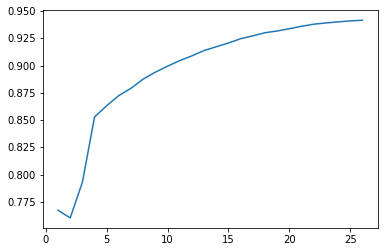

In [11]:

plt.plot(tree_df['depth'], tree_df['accuracy'])
plt.show()

In [15]:
estimator_list = []
accuracy_list = []
#range changed based on previous run
for estimator in range(100,300,50):
    tree = RandomForestClassifier(max_depth=26,n_estimators=estimator)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test,y_test)
    print('Estimator: ',estimator, ' Accuracy: ', accuracy)
    accuracy_list.append(tree.score(X_test,y_test))
    estimator_list.append(depth)

Estimator:  100  Accuracy:  0.9411389829467364
Estimator:  150  Accuracy:  0.9415689616781455
Estimator:  200  Accuracy:  0.941430754228764
Estimator:  250  Accuracy:  0.9415996744446747


Estimator=250 will give best accuracy

In [17]:
from sklearn.model_selection import cross_val_score
tree = RandomForestClassifier( n_estimators=250,max_depth=26,random_state=42)

cv_score = cross_val_score(tree, X_train, y_train, cv=5)
cv_score

array([0.93971648, 0.93972608, 0.93933199, 0.94001344, 0.94110759])

In [ ]:

print("Mean: {:.2f}".format(cv_score.mean()))

In [19]:
import sklearn.metrics as metrics
rf = RandomForestClassifier( n_estimators=250,max_depth=25,random_state=42)
start_time = time.time()
rf.fit(X_train,y_train)
elapsed_time = time.time() - start_time/ 60  # convert to minutes
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %s" % score)
print ("%s : %s |Time:%s" %("RandomForestClassifier", score,elapsed_time))

              precision    recall  f1-score   support

      benign       0.94      0.99      0.96     85778
  defacement       0.96      1.00      0.98     19104
    phishing       0.99      0.93      0.96      6521
     malware       0.90      0.67      0.77     18836

    accuracy                           0.94    130239
   macro avg       0.95      0.90      0.92    130239
weighted avg       0.94      0.94      0.94    130239

accuracy:   0.9406475786822688
RandomForestClassifier : 0.9406475786822688 |Time:1658737321.112221


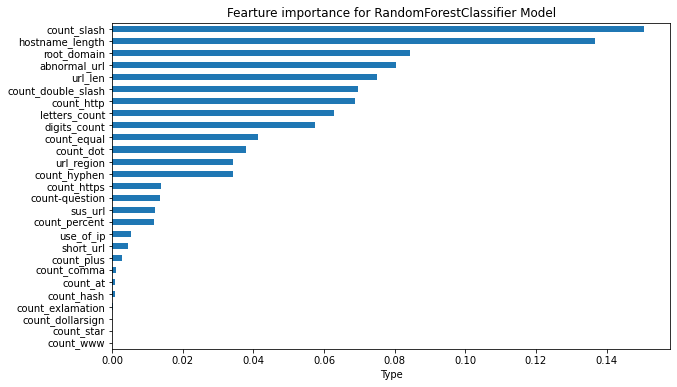

In [21]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6)).set(xlabel='Type',title = 'Fearture importance for RandomForestClassifier Model')
plt.savefig("images/fearture-importance-RandomForestClassifier-improved")

I got accurancy of 93.70% for RandomForestClassifier in first phase with no parameter, after above experimentation the accurancy was improved to 94.064%. The feature importance increased too.